In [1]:
from __future__ import  print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [18]:
batch_size = 128
num_classes =10
epochs =12

# input image dimensions
img_row, img_cols = 28,28

(X_train, y_train), (X_test, y_test)= mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [0]:
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0],1, img_row, img_cols)
  X_test = X_test.reshape(X_test.shape[0],1, img_row, img_cols)
  input_shape = (1, img_row, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_row, img_cols,1)
  X_test = X_test.reshape(X_test.shape[0],img_row, img_cols,1)
  input_shape = (img_row, img_cols,1 )

In [20]:
# Normalizing the pixel values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

print(X_train.shape[0],'train samples')
print(X_test.shape[0],' test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000  test samples


In [0]:
# converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




### model 1: filter 3x3 
 a. basic model : without dropdout and batch norm

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
              

In [7]:
history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.2815 - acc: 0.9219 - val_loss: 0.1199 - val_acc: 0.9671
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0952 - acc: 0.9737 - val_loss: 0.0818 - val_acc: 0.9755
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0646 - acc: 0.9820 - val_loss: 0.0656 - val_acc: 0.9800
Epoch 4/12
41600/60000 [===================>..........] - ETA: 1s - loss: 0.0481 - acc: 0.9861

60000/60000 [==============================] - 5s 79us/step - loss: 0.0491 - acc: 0.9860 - val_loss: 0.0616 - val_acc: 0.9800
Epoch 5/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0402 - acc: 0.9882 - val_loss: 0.0598 - val_acc: 0.9809
Epoch 6/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0328 - acc: 0.9907 - val_loss: 0.0654 - val_acc: 0.9803
Epoch 7/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0276 - acc: 0.9924 - val_loss: 0.0645 - val_acc: 0.9804
Epoch 8/12
13184/60000 [=====>........................] - ETA: 3s - loss: 0.0230 - acc: 0.9937

60000/60000 [==============================] - 5s 77us/step - loss: 0.0237 - acc: 0.9932 - val_loss: 0.0594 - val_acc: 0.9828
Epoch 9/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0190 - acc: 0.9948 - val_loss: 0.0661 - val_acc: 0.9804
Epoch 10/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0164 - acc: 0.9957 - val_loss: 0.0691 - val_acc: 0.9811
Epoch 11/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0135 - acc: 0.9962 - val_loss: 0.0676 - val_acc: 0.9813
Epoch 12/12
 9216/60000 [===>..........................] - ETA: 3s - loss: 0.0094 - acc: 0.9983

60000/60000 [==============================] - 5s 77us/step - loss: 0.0111 - acc: 0.9975 - val_loss: 0.0711 - val_acc: 0.9800
Test loss 0.07109866095322068
Test accuracy 0.98


In [12]:
epochs_list = list(range(1,epochs+1))
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

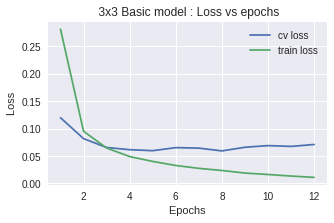

In [15]:
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 3x3 Basic model : Loss vs epochs")
plt.show()

b. Complex model with more layers
 - with dropdout and batch norm

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.3329 - acc: 0.9001 - val_loss: 0.0564 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.1229 - acc: 0.9643 - val_loss: 0.0394 - val_acc: 0.9876
Epoch 3/12
23680/60000 [==========>...................] - ETA: 6s - loss: 0.0964 - acc: 0.9713

60000/60000 [==============================] - 11s 183us/step - loss: 0.0946 - acc: 0.9726 - val_loss: 0.0318 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0790 - acc: 0.9769 - val_loss: 0.0446 - val_acc: 0.9862
Epoch 5/12
59648/60000 [============================>.] - ETA: 0s - loss: 0.0698 - acc: 0.9799

60000/60000 [==============================] - 10s 175us/step - loss: 0.0697 - acc: 0.9799 - val_loss: 0.0249 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0641 - acc: 0.9813 - val_loss: 0.0254 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.0582 - acc: 0.9829 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 8/12
 4736/60000 [=>............................] - ETA: 9s - loss: 0.0517 - acc: 0.9852

60000/60000 [==============================] - 11s 178us/step - loss: 0.0553 - acc: 0.9840 - val_loss: 0.0227 - val_acc: 0.9929
Epoch 9/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0515 - acc: 0.9851 - val_loss: 0.0224 - val_acc: 0.9929
Epoch 10/12
52352/60000 [=========================>....] - ETA: 1s - loss: 0.0497 - acc: 0.9864

60000/60000 [==============================] - 11s 178us/step - loss: 0.0488 - acc: 0.9866 - val_loss: 0.0211 - val_acc: 0.9926
Epoch 11/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0467 - acc: 0.9863 - val_loss: 0.0216 - val_acc: 0.9932
Epoch 12/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0275 - val_acc: 0.9927
Test loss 0.027535104267233965
Test accuracy 0.9927


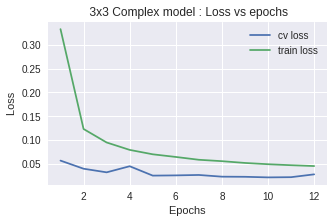

In [24]:
epochs_list = list(range(1,epochs+1))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 3x3 Complex model : Loss vs epochs")
plt.show()

### model 2 :  filter 2x2
 a. basic model : without dropdout and batch norm

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.2722 - acc: 0.9223 - val_loss: 0.1107 - val_acc: 0.9681
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0934 - acc: 0.9727 - val_loss: 0.0797 - val_acc: 0.9754
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0621 - acc: 0.9820 - val_loss: 0.0628 - val_acc: 0.9798
Epoch 4/12
21248/60000 [=========>....................] - ETA: 3s - loss: 0.0453 - acc: 0.9872

60000/60000 [==============================] - 5s 90us/step - loss: 0.0469 - acc: 0.9858 - val_loss: 0.0624 - val_acc: 0.9791
Epoch 5/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0351 - acc: 0.9897 - val_loss: 0.0534 - val_acc: 0.9831
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0285 - acc: 0.9914 - val_loss: 0.0560 - val_acc: 0.9813
Epoch 7/12
50304/60000 [========================>.....] - ETA: 0s - loss: 0.0219 - acc: 0.9937

60000/60000 [==============================] - 5s 91us/step - loss: 0.0217 - acc: 0.9939 - val_loss: 0.0527 - val_acc: 0.9840
Epoch 8/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0171 - acc: 0.9950 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 9/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0137 - acc: 0.9961 - val_loss: 0.0528 - val_acc: 0.9845
Epoch 10/12
54912/60000 [==========================>...] - ETA: 0s - loss: 0.0115 - acc: 0.9965

60000/60000 [==============================] - 5s 90us/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0549 - val_acc: 0.9838
Epoch 11/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0085 - acc: 0.9975 - val_loss: 0.0603 - val_acc: 0.9833
Epoch 12/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0062 - acc: 0.9984 - val_loss: 0.0591 - val_acc: 0.9845
Test loss 0.05905653226806608
Test accuracy 0.9845


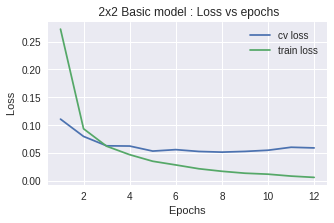

In [26]:
epochs_list = list(range(1,epochs+1))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 2x2 Basic model : Loss vs epochs")
plt.show()

b. Complex model with more layers
- with dropdout and batch norm

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.4313 - acc: 0.8663 - val_loss: 0.1083 - val_acc: 0.9685
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.1669 - acc: 0.9503 - val_loss: 0.0535 - val_acc: 0.9823
Epoch 3/12
29312/60000 [=============>................] - ETA: 4s - loss: 0.1376 - acc: 0.9586

60000/60000 [==============================] - 9s 151us/step - loss: 0.1326 - acc: 0.9608 - val_loss: 0.0438 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.1113 - acc: 0.9672 - val_loss: 0.0395 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0997 - acc: 0.9705 - val_loss: 0.0406 - val_acc: 0.9879
Epoch 6/12
 1280/60000 [..............................] - ETA: 8s - loss: 0.0603 - acc: 0.9805

60000/60000 [==============================] - 9s 150us/step - loss: 0.0942 - acc: 0.9719 - val_loss: 0.0433 - val_acc: 0.9862
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0874 - acc: 0.9742 - val_loss: 0.0678 - val_acc: 0.9776
Epoch 8/12
55424/60000 [==========================>...] - ETA: 0s - loss: 0.0851 - acc: 0.9748

60000/60000 [==============================] - 9s 150us/step - loss: 0.0846 - acc: 0.9749 - val_loss: 0.0307 - val_acc: 0.9896
Epoch 9/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0801 - acc: 0.9765 - val_loss: 0.0391 - val_acc: 0.9876
Epoch 10/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0775 - acc: 0.9768 - val_loss: 0.0400 - val_acc: 0.9876
Epoch 11/12
 5120/60000 [=>............................] - ETA: 7s - loss: 0.0640 - acc: 0.9832

60000/60000 [==============================] - 9s 150us/step - loss: 0.0748 - acc: 0.9780 - val_loss: 0.0299 - val_acc: 0.9900
Epoch 12/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0709 - acc: 0.9792 - val_loss: 0.0423 - val_acc: 0.9875
Test loss 0.042263011195080614
Test accuracy 0.9875


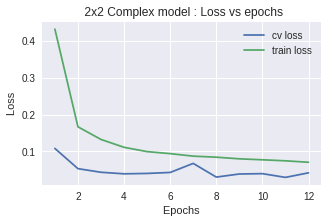

In [28]:
epochs_list = list(range(1,epochs+1))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 2x2 Complex model : Loss vs epochs")
plt.show()

### model 3: filter 5x5 
 a. basic model : without dropdout and batch norm

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.2013 - acc: 0.9417 - val_loss: 0.0655 - val_acc: 0.9789
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0570 - acc: 0.9828 - val_loss: 0.0477 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0381 - acc: 0.9885 - val_loss: 0.0397 - val_acc: 0.9868
Epoch 4/12
29056/60000 [=============>................] - ETA: 2s - loss: 0.0255 - acc: 0.9925

60000/60000 [==============================] - 5s 84us/step - loss: 0.0287 - acc: 0.9914 - val_loss: 0.0354 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0223 - acc: 0.9934 - val_loss: 0.0369 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0169 - acc: 0.9942 - val_loss: 0.0329 - val_acc: 0.9901
Epoch 7/12
56064/60000 [===========================>..] - ETA: 0s - loss: 0.0121 - acc: 0.9962

60000/60000 [==============================] - 5s 85us/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0379 - val_acc: 0.9884
Epoch 8/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0405 - val_acc: 0.9889
Epoch 9/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0069 - acc: 0.9982 - val_loss: 0.0459 - val_acc: 0.9881
Epoch 10/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0395 - val_acc: 0.9887
Epoch 11/12
 4224/60000 [=>............................] - ETA: 4s - loss: 0.0060 - acc: 0.9983

60000/60000 [==============================] - 5s 85us/step - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0407 - val_acc: 0.9895
Epoch 12/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0491 - val_acc: 0.9878
Test loss 0.049073257441515576
Test accuracy 0.9878


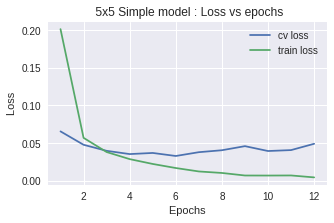

In [30]:
epochs_list = list(range(1,epochs+1))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 5x5 Simple model : Loss vs epochs")
plt.show()

b. Complex model with more layers
- with dropdout and batch norm


In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))   
              
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss',score[0])
print('Test accuracy', score[1])              


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.2966 - acc: 0.9084 - val_loss: 0.0622 - val_acc: 0.9804
Epoch 2/12
60000/60000 [==============================] - 10s 158us/step - loss: 0.0917 - acc: 0.9731 - val_loss: 0.0347 - val_acc: 0.9897
Epoch 3/12
28928/60000 [=============>................] - ETA: 4s - loss: 0.0714 - acc: 0.9790

60000/60000 [==============================] - 9s 158us/step - loss: 0.0692 - acc: 0.9797 - val_loss: 0.0351 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0595 - acc: 0.9823 - val_loss: 0.0273 - val_acc: 0.9908
Epoch 5/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0506 - acc: 0.9853 - val_loss: 0.0270 - val_acc: 0.9908
Epoch 6/12
  896/60000 [..............................] - ETA: 9s - loss: 0.0859 - acc: 0.9833

60000/60000 [==============================] - 9s 158us/step - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0267 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0397 - acc: 0.9884 - val_loss: 0.0240 - val_acc: 0.9926
Epoch 8/12
55424/60000 [==========================>...] - ETA: 0s - loss: 0.0373 - acc: 0.9890

60000/60000 [==============================] - 9s 158us/step - loss: 0.0375 - acc: 0.9889 - val_loss: 0.0208 - val_acc: 0.9929
Epoch 9/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0202 - val_acc: 0.9931
Epoch 10/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0330 - acc: 0.9901 - val_loss: 0.0240 - val_acc: 0.9929
Epoch 11/12
 5504/60000 [=>............................] - ETA: 8s - loss: 0.0272 - acc: 0.9916

60000/60000 [==============================] - 9s 156us/step - loss: 0.0311 - acc: 0.9908 - val_loss: 0.0261 - val_acc: 0.9922
Epoch 12/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0307 - acc: 0.9911 - val_loss: 0.0204 - val_acc: 0.9937
Test loss 0.020443291626425344
Test accuracy 0.9937


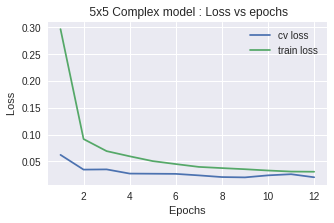

In [32]:
epochs_list = list(range(1,epochs+1))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 5x5 Complex model : Loss vs epochs")
plt.show()